## Qualitative Analysis for Event Log with Time-Based Discount

Implemented decision points with guards:
- Request Manager or Standard Approval:
    - Request Manager Approval if total_price >= 800
    - Request Standard Approval if total_price <= 1000
- Manager Rejection or Approval:
    - Manager Rejection if total_price >= 500 and random_exponential(100, 200) > 120
    - No Guard for Manager Approval 
- Standard Rejection or Approval:
    - Standard Rejection if total_price >= 500 and random_exponential(100, 200) > 120
    - No Guard for Standard Approval 
- Send Order to Vendor or Send Order to Vendor with Discount:
    - Send Order to Vendor if discount_needed is false
    - Send Order to Vendor with Discount with discount_needed is true

In [1]:
import os
from exdpn.util import import_log
from exdpn.data_petri_net import data_petri_net
from exdpn.guards import ML_Technique
from exdpn.util import extend_event_log_with_preceding_event_delay

#### First, look which machine learning guard has the highest performance for a decision point.

In [2]:
event_log_time_based_discount = import_log(os.path.join(os.getcwd(), '..', 'datasets', 'p2p_with_time_based_discount.xes'))
extend_event_log_with_preceding_event_delay(event_log_time_based_discount, 'delay')
dpn_time_based_discount = data_petri_net.Data_Petri_Net(event_log = event_log_time_based_discount, 
                                                  event_level_attributes = ['item_category','item_id','item_amount','supplier','total_price','delay'],
                                                  verbose = False)

decision_points = list(dpn_time_based_discount.decision_points)
decision_points

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


[({'request manager approval'}, {'manager approve purchase', 'manager reject purchase'}),
 ({'create purchase order'}, {'request standard approval', 'request manager approval'}),
 ({'request standard approval'}, {'reject purchase', 'approve purchase'}),
 ({'approve purchase', 'manager approve purchase'}, {'send order to vendor', 'send order to vendor with discount'})]

Decision point:  ({'request manager approval'}, {'manager approve purchase', 'manager reject purchase'})
Best guard: <exdpn.guards.decision_tree_guard.Decision_Tree_Guard object at 0x00000211EA520E80>


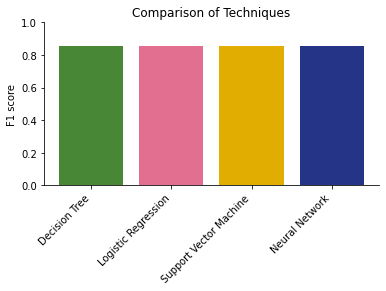

In [3]:
print("Decision point: ", decision_points[0])
dpn_time_based_discount.guard_manager_per_place[decision_points[0]].get_comparison_plot()
best_guard = dpn_time_based_discount.get_guard_at_place(decision_points[0])
print("Best guard:", best_guard)

Decision point:  ({'create purchase order'}, {'request standard approval', 'request manager approval'})
Best guard: <exdpn.guards.decision_tree_guard.Decision_Tree_Guard object at 0x00000211EA521420>


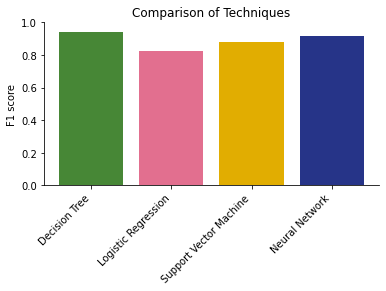

In [4]:
print("Decision point: ", decision_points[1])
dpn_time_based_discount.guard_manager_per_place[decision_points[1]].get_comparison_plot()
best_guard = dpn_time_based_discount.get_guard_at_place(decision_points[1])
print("Best guard:", best_guard)

Decision point:  ({'request standard approval'}, {'reject purchase', 'approve purchase'})
Best guard: <exdpn.guards.decision_tree_guard.Decision_Tree_Guard object at 0x00000211EA521E70>


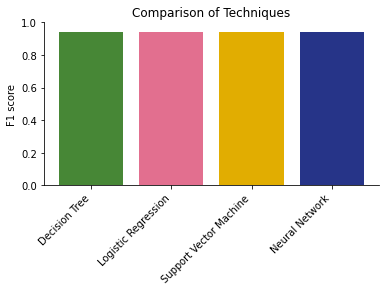

In [5]:
print("Decision point: ", decision_points[2])
dpn_time_based_discount.guard_manager_per_place[decision_points[2]].get_comparison_plot()
best_guard = dpn_time_based_discount.get_guard_at_place(decision_points[2])
print("Best guard:", best_guard)

Decision point:  ({'approve purchase', 'manager approve purchase'}, {'send order to vendor', 'send order to vendor with discount'})
Best guard: <exdpn.guards.svm_guard.SVM_Guard object at 0x00000211EA522830>


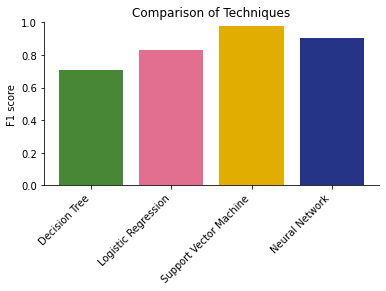

In [6]:
print("Decision point: ", decision_points[3])
dpn_time_based_discount.guard_manager_per_place[decision_points[3]].get_comparison_plot()
best_guard = dpn_time_based_discount.get_guard_at_place(decision_points[3])
print("Best guard:", best_guard)

### Decision Tree 

Decision point:  ({'request manager approval'}, {'manager approve purchase', 'manager reject purchase'})


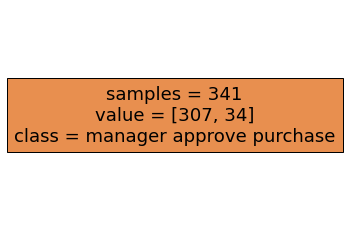

In [7]:
print("Decision point: ", decision_points[0])
dt_guard = dpn_time_based_discount.guard_manager_per_place[decision_points[0]].guards_list[ML_Technique.DT]
if dt_guard.is_explainable():
    dt_guard.get_explainable_representation()

Decision point:  ({'create purchase order'}, {'request standard approval', 'request manager approval'})


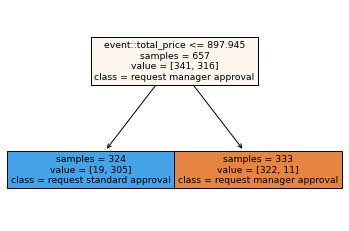

In [8]:
print("Decision point: ", decision_points[1])
dt_guard = dpn_time_based_discount.guard_manager_per_place[decision_points[1]].guards_list[ML_Technique.DT]
if dt_guard.is_explainable():
    dt_guard.get_explainable_representation()

Decision point:  ({'request standard approval'}, {'reject purchase', 'approve purchase'})


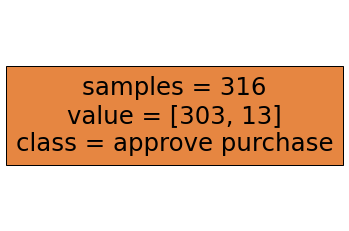

In [9]:
print("Decision point: ", decision_points[2])
dt_guard = dpn_time_based_discount.guard_manager_per_place[decision_points[2]].guards_list[ML_Technique.DT]
if dt_guard.is_explainable():
    dt_guard.get_explainable_representation()

Decision point:  ({'approve purchase', 'manager approve purchase'}, {'send order to vendor', 'send order to vendor with discount'})


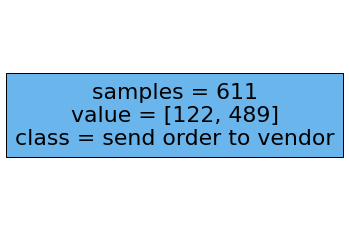

In [10]:
print("Decision point: ", decision_points[3])
dt_guard = dpn_time_based_discount.guard_manager_per_place[decision_points[3]].guards_list[ML_Technique.DT]
if dt_guard.is_explainable():
    dt_guard.get_explainable_representation()

### Neural Network 

Decision point:  ({'request manager approval'}, {'manager approve purchase', 'manager reject purchase'})


  0%|          | 0/100 [00:00<?, ?it/s]

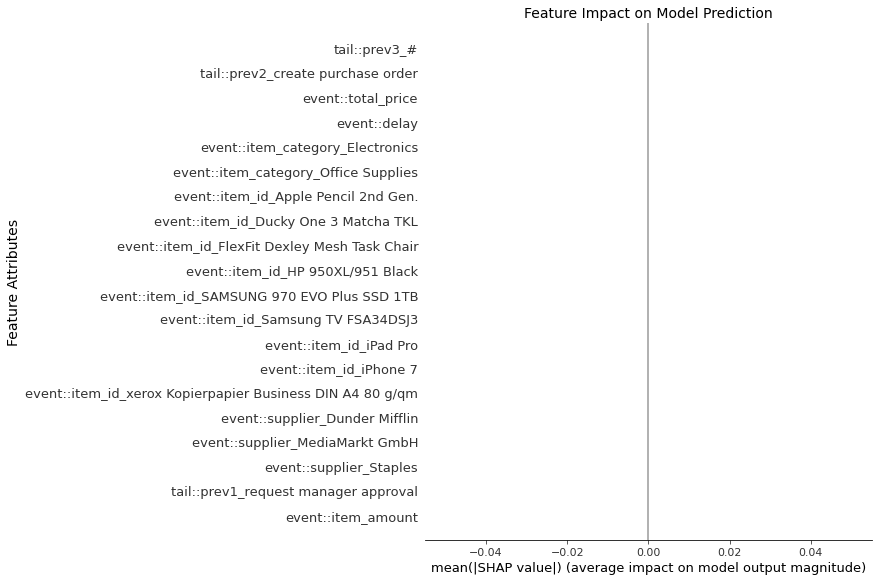

In [11]:
print("Decision point: ", decision_points[0])
nn_guard = dpn_time_based_discount.guard_manager_per_place[decision_points[0]].guards_list[ML_Technique.NN]
if nn_guard.is_explainable():
    nn_guard.get_explainable_representation()

Decision point:  ({'create purchase order'}, {'request standard approval', 'request manager approval'})


  0%|          | 0/100 [00:00<?, ?it/s]

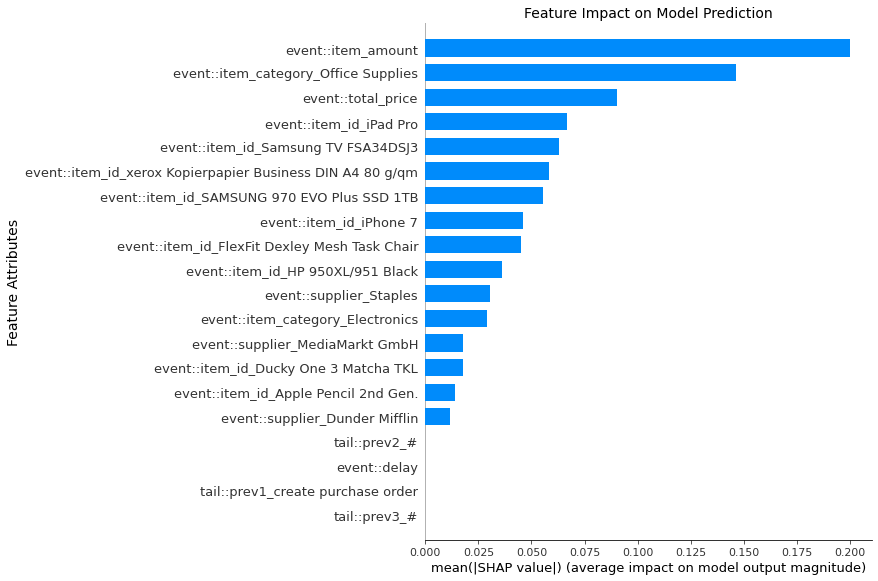

In [12]:
print("Decision point: ", decision_points[1])
nn_guard = dpn_time_based_discount.guard_manager_per_place[decision_points[1]].guards_list[ML_Technique.NN]
if nn_guard.is_explainable():
    nn_guard.get_explainable_representation()

Decision point:  ({'request standard approval'}, {'reject purchase', 'approve purchase'})


  0%|          | 0/100 [00:00<?, ?it/s]

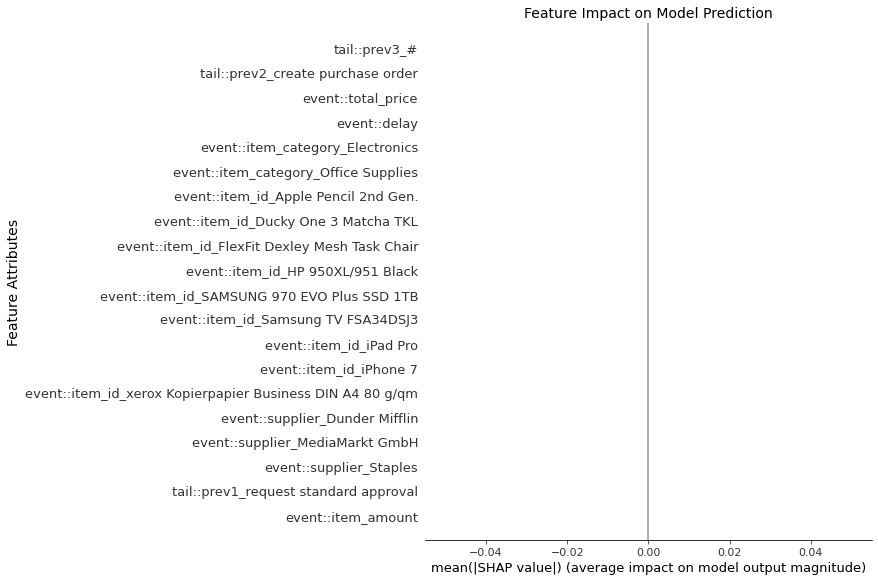

In [13]:
print("Decision point: ", decision_points[2])
nn_guard = dpn_time_based_discount.guard_manager_per_place[decision_points[2]].guards_list[ML_Technique.NN]
if nn_guard.is_explainable():
    nn_guard.get_explainable_representation()

Decision point:  ({'approve purchase', 'manager approve purchase'}, {'send order to vendor', 'send order to vendor with discount'})


  0%|          | 0/100 [00:00<?, ?it/s]

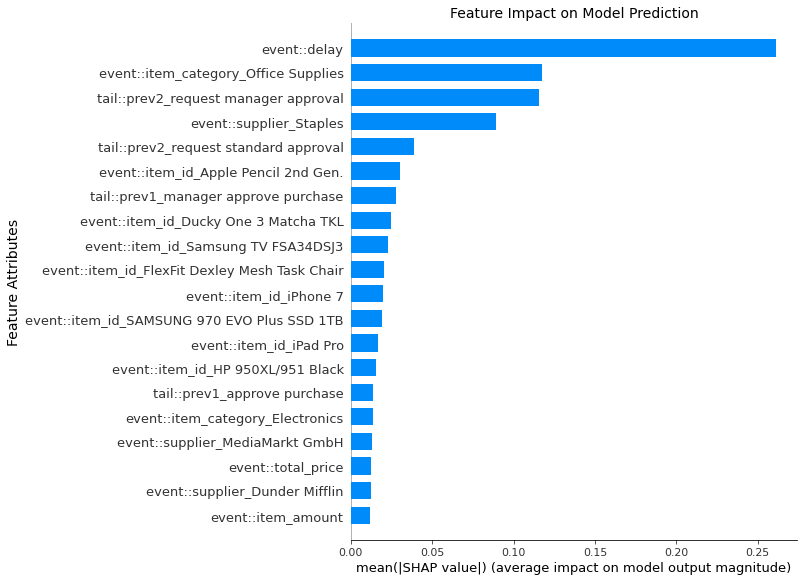

In [14]:
print("Decision point: ", decision_points[3])
nn_guard = dpn_time_based_discount.guard_manager_per_place[decision_points[3]].guards_list[ML_Technique.NN]
if nn_guard.is_explainable():
    nn_guard.get_explainable_representation()

### Support Vector Machine 

Decision point:  ({'request manager approval'}, {'manager approve purchase', 'manager reject purchase'})


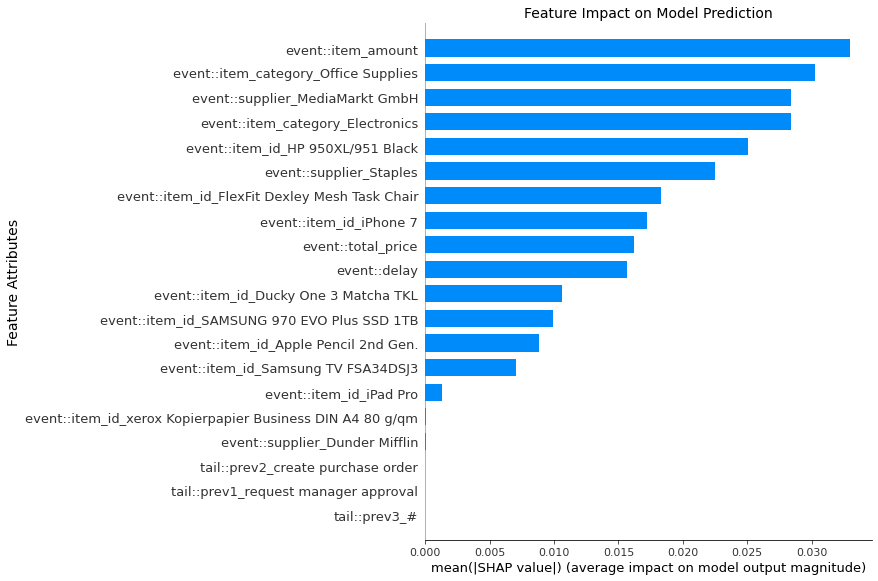

In [15]:
print("Decision point: ", decision_points[0])
svm_guard = dpn_time_based_discount.guard_manager_per_place[decision_points[0]].guards_list[ML_Technique.SVM]
if svm_guard.is_explainable():
    svm_guard.get_explainable_representation()

Decision point:  ({'create purchase order'}, {'request standard approval', 'request manager approval'})


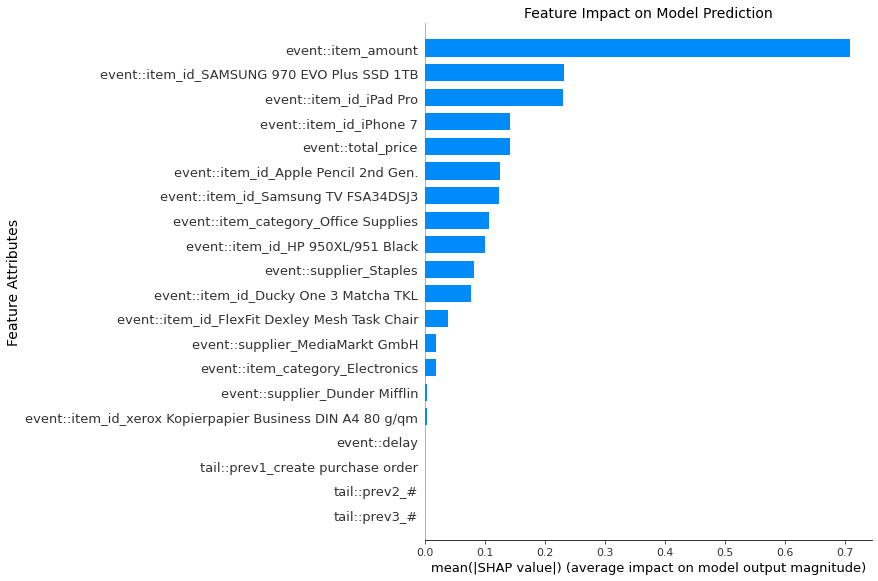

In [16]:
print("Decision point: ", decision_points[1])
svm_guard = dpn_time_based_discount.guard_manager_per_place[decision_points[1]].guards_list[ML_Technique.SVM]
if svm_guard.is_explainable():
    svm_guard.get_explainable_representation()

Decision point:  ({'request standard approval'}, {'reject purchase', 'approve purchase'})


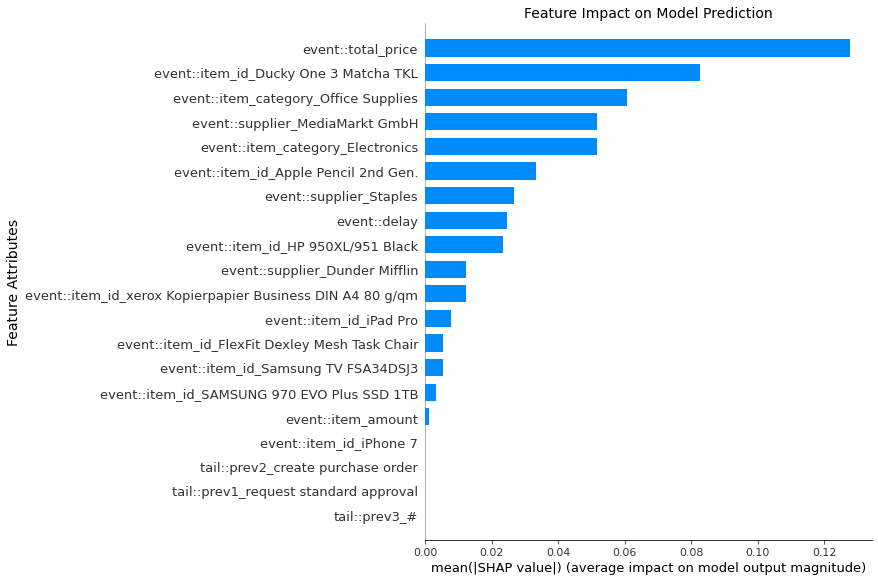

In [17]:
print("Decision point: ", decision_points[2])
svm_guard = dpn_time_based_discount.guard_manager_per_place[decision_points[2]].guards_list[ML_Technique.SVM]
if svm_guard.is_explainable():
    svm_guard.get_explainable_representation()

Decision point:  ({'approve purchase', 'manager approve purchase'}, {'send order to vendor', 'send order to vendor with discount'})


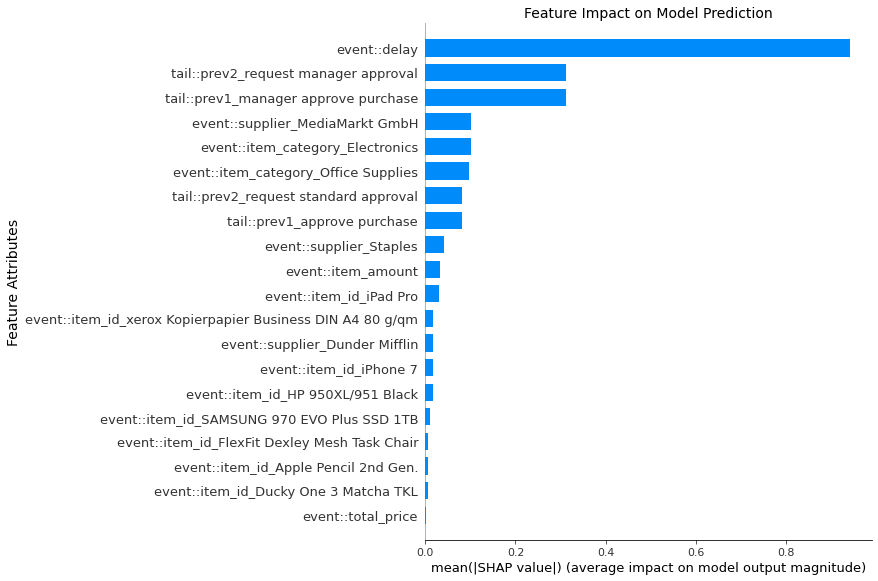

In [18]:
print("Decision point: ", decision_points[3])
svm_guard = dpn_time_based_discount.guard_manager_per_place[decision_points[3]].guards_list[ML_Technique.SVM]
if svm_guard.is_explainable():
    svm_guard.get_explainable_representation()

### Logistic Regression 

Decision point:  ({'request manager approval'}, {'manager approve purchase', 'manager reject purchase'})


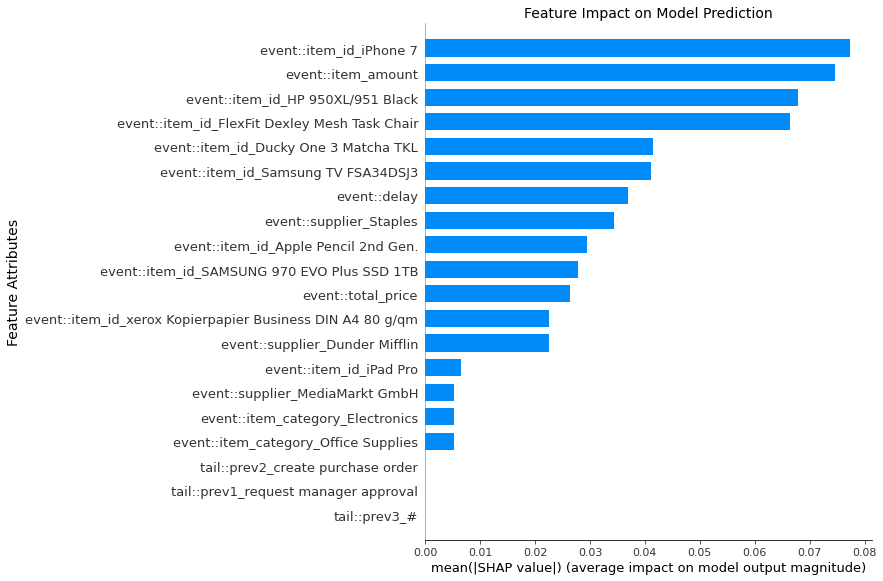

In [19]:
print("Decision point: ", decision_points[0])
lr_guard = dpn_time_based_discount.guard_manager_per_place[decision_points[0]].guards_list[ML_Technique.LR]
if lr_guard.is_explainable():
    lr_guard.get_explainable_representation()

Decision point:  ({'create purchase order'}, {'request standard approval', 'request manager approval'})


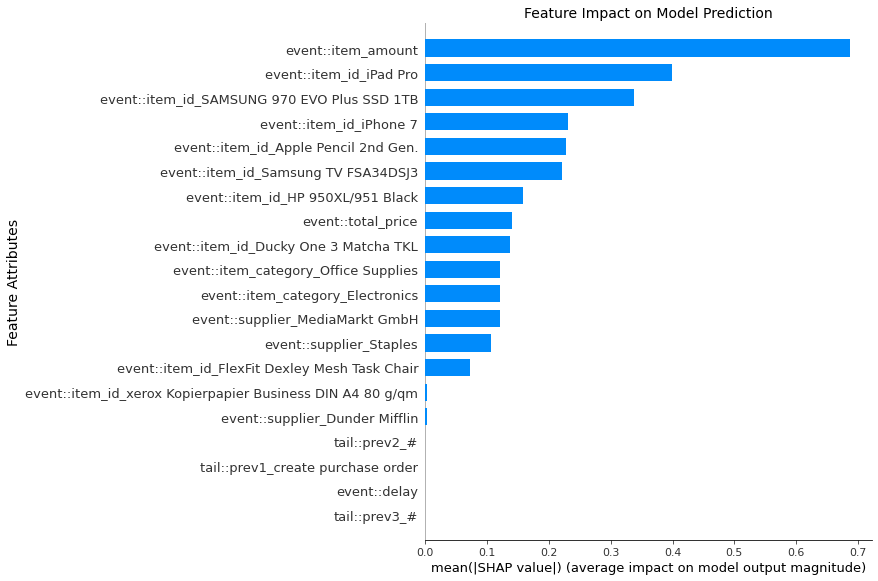

In [20]:
print("Decision point: ", decision_points[1])
lr_guard = dpn_time_based_discount.guard_manager_per_place[decision_points[1]].guards_list[ML_Technique.LR]
if lr_guard.is_explainable():
    lr_guard.get_explainable_representation()

Decision point:  ({'request standard approval'}, {'reject purchase', 'approve purchase'})


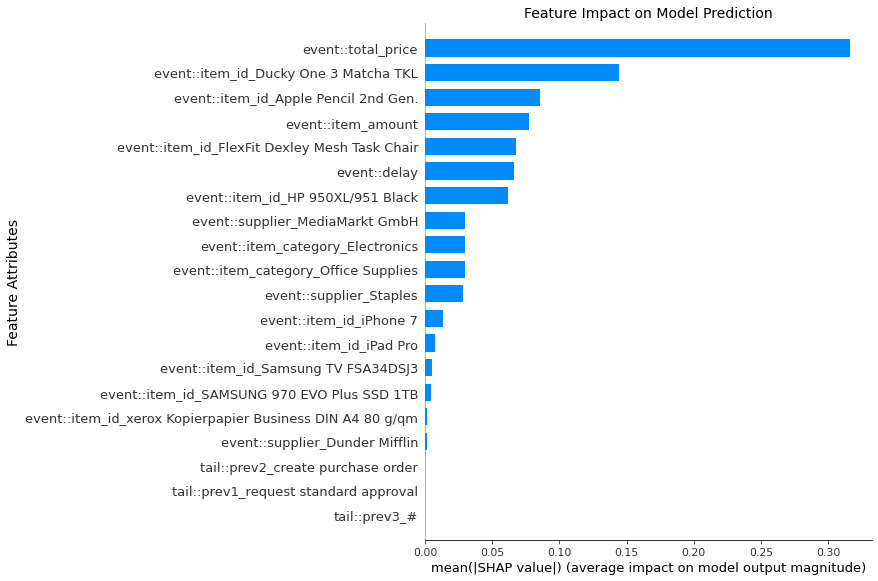

In [21]:
print("Decision point: ", decision_points[2])
lr_guard = dpn_time_based_discount.guard_manager_per_place[decision_points[2]].guards_list[ML_Technique.LR]
if lr_guard.is_explainable():
    lr_guard.get_explainable_representation()

Decision point:  ({'approve purchase', 'manager approve purchase'}, {'send order to vendor', 'send order to vendor with discount'})


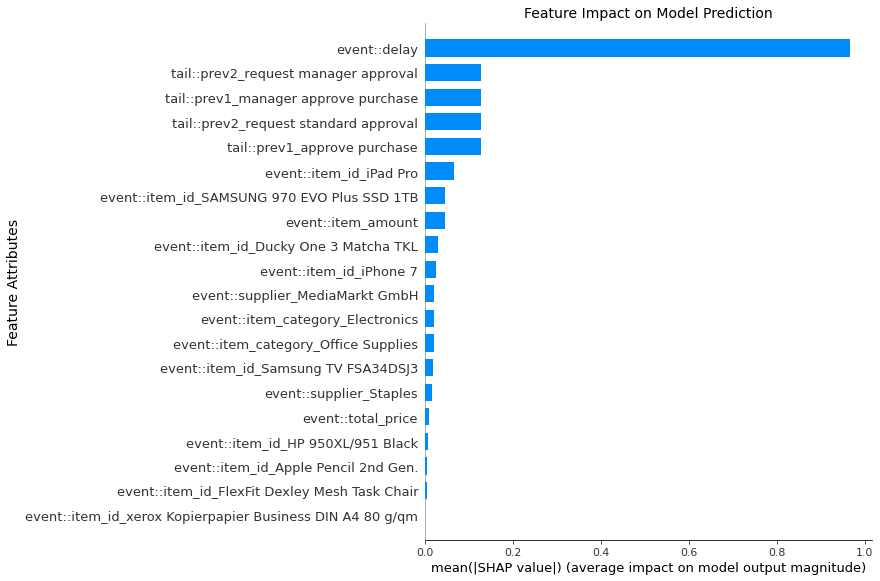

In [22]:
print("Decision point: ", decision_points[3])
lr_guard = dpn_time_based_discount.guard_manager_per_place[decision_points[3]].guards_list[ML_Technique.LR]
if lr_guard.is_explainable():
    lr_guard.get_explainable_representation()

### Summary Event Log with Time-Based Discount:

- Request Manager or Standard Approval (similar to Event Log without randomness):  
Only the Decision Tree guard models the true underlying guard. The split to classify the date samples is total_price <= 897. For the other three machine learning techniques the feature attribute item_amount has a huge impact on the model prediction, this attribute is correlated with total_price.

- Manager Rejection or Approval (similar to Event Log without randomness):  
All machine learning techniques have problems modeling the true underlying guard. We can see that the Support Vector Machine guard again uses item_amout for its prediction. Logistic Regression guard seems to pick up noise instead of the true underlying guard. But it is possible that the features with the most impact correlate with the total_price. For the Neural Network guard all feature attributes only have a very small impact on the model prediction, thus the plot is empty.

- Standard Rejection or Approval (similar to Event Log without randomness):  
Again, all techniques struggle to model the true underlying guard. Only for the Logistic Regression guard total_price is the feature attribute with the highest impact. The Support Vector Machine guard seems to pick up noise instead of the true underlying guard. But it could also be possible that the features with the most impact correlate with the total_price (e.g., maybe "Office Supplies" often have a total_price >= or < 500). For the Neural Network guard all feature attributes only have a very small impact on the model prediction, thus the plot is empty.

- Send Order to Vendor or Send Order to Vendor with Discount:  
While the Decision Tree guard is not able to model the true underlying guard, that is, to send an order with discount if the boolean variable discount_needed is True, for all other machine learning techniques discount_needed is the feature attribute with the highest impact on model prediction.

Overall, all machine learning techniques have their problems modeling the true underlying behavior of the guard if the decisions are partly random. But we can also see, that for example the Decision Tree is at advantage for modeling a binary numeric decision with some overlapping, while the other three techniques are able to detect some correlation between other feature attributes and the feature attribute used in the true guard. While the Decision Tree is not able to model an guard dependent on a boolean variable, the other techniques have no difficulties with it. Nevertheless all four machine learning guards achieve high performance scores measures using F1-score as seen in the comparision plots, excluded the Decision Tree guard for predicting whether to send an order with or without discount.